# 🧪 Pré-processamento de Dados – Grupo: App – Controle Financeiro
Aplicativo para controle de receitas e despesas pessoais.

> Este notebook contém instruções para realizar as etapas de pré-processamento com base no dataset do projeto. Utilize as células abaixo como base para desenvolver sua análise.

## Integrantes ##
- André Rosa
- Guilherme Coutinho de Moura
- Junior Araujo da Silva

## 📁 Etapa 1: Importação de bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

## 📂 Etapa 2: Carregamento do Dataset
Carregue o dataset `app_controle_financeiro.csv`.

In [2]:
# Leitura do arquivo (certifique-se de que ele esteja no mesmo diretório ou faça upload)
df = pd.read_csv("app_controle_financeiro.csv")
df.head()

,id_transacao,tipo,categoria,valor,meio_pagamento,data_transacao
0,1,Despesa,Saúde,1930.29,Dinheiro,2023-07-10
1,2,Despesa,Lazer,1568.54,Dinheiro,2023-02-08
2,3,Receita,Moradia,1078.88,Dinheiro,2023-09-28
3,4,Receita,Educação,534.22,Dinheiro,2023-09-22
4,5,Receita,Alimentação,77.27,Dinheiro,2023-10-03


## 🧼 Etapa 3: Limpeza de Dados
Verificação de valores nulos, duplicados, inconsistentes.

In [3]:
# Verificar valores ausentes
print(df.isnull().sum())

# Verificar duplicatas
print("Duplicatas:", df.duplicated().sum())

# Excluir duplicatas se necessário
# df = df.drop_duplicates()
print(df.columns)


id_transacao      0
tipo              0
categoria         0
valor             0
meio_pagamento    0
data_transacao    0
dtype: int64
Duplicatas: 0
Index(['id_transacao', 'tipo', 'categoria', 'valor', 'meio_pagamento',
       'data_transacao'],
      dtype='object')


## 🔗 Etapa 4: Integração de Dados (se aplicável)
Exemplo de junção com outro dataframe.

In [ ]:
# Exemplo fictício de junção
# df_outro = pd.read_csv("outro_dataset.csv")
# df = pd.merge(df, df_outro, how='left', on='id_comum')


## 🧹 Etapa 5: Redução de Dados
Amostragem, remoção de atributos irrelevantes.

In [6]:
# Excluir colunas irrelevantes
# df = df.drop(columns=['coluna_irrelevante'])

# Amostragem (10%)
# df_amostra = df.sample(frac=0.1, random_state=42)


## 🔄 Etapa 6: Transformação de Dados
Inclui normalização, codificação de categorias, padronização de formatos.

In [4]:
# Normalização com Min-Max
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['valor']] = scaler.fit_transform(df[['valor']])

# Codificação de categorias
df = pd.get_dummies(df, columns=['categoria'])
df = pd.get_dummies(df, columns=['meio_pagamento'])

# Padronização de texto
df['tipo'] = df['tipo'].str.lower().str.strip()
print(df.columns)
df.head()

Index(['id_transacao', 'tipo', 'valor', 'data_transacao',
       'categoria_Alimentação', 'categoria_Educação', 'categoria_Lazer',
       'categoria_Moradia', 'categoria_Saúde', 'categoria_Transporte',
       'meio_pagamento_Cartão Crédito', 'meio_pagamento_Cartão Débito',
       'meio_pagamento_Dinheiro', 'meio_pagamento_Transferência'],
      dtype='object')


,id_transacao,tipo,valor,data_transacao,categoria_Alimentação,categoria_Educação,categoria_Lazer,categoria_Moradia,categoria_Saúde,categoria_Transporte,meio_pagamento_Cartão Crédito,meio_pagamento_Cartão Débito,meio_pagamento_Dinheiro,meio_pagamento_Transferência
0,1,despesa,0.966161,2023-07-10,False,False,False,False,True,False,False,False,True,False
1,2,despesa,0.783916,2023-02-08,False,False,True,False,False,False,False,False,True,False
2,3,receita,0.537232,2023-09-28,False,False,False,True,False,False,False,False,True,False
3,4,receita,0.262840,2023-09-22,False,True,False,False,False,False,False,False,True,False
4,5,receita,0.032635,2023-10-03,True,False,False,False,False,False,False,False,True,False


## 📊 Etapa 7: Análise Exploratória
Visualização de dados para melhor compreensão.

<Axes: xlabel='categoria_Alimentação', ylabel='valor'>

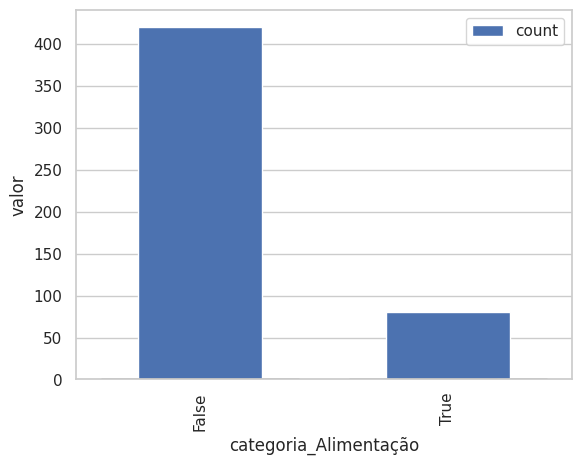

In [5]:
# Distribuição de categorias
df['categoria_Alimentação'].value_counts().plot(kind='bar')

# Boxplot para identificar outliers
sns.boxplot(x='categoria_Alimentação', y='valor', data=df)


## 🧠 Reflexão Final
Explique as principais dificuldades encontradas na limpeza e transformação dos dados e como elas impactam o modelo de mineração de dados.

In [64]:
# Utilize esta célula para sua resposta
resposta = """    1. Quais foram os principais problemas encontrados no dataset e como foram tratados?
R.: Não encontramos problemas, pois a limpeza nos dados foi mínima.
    2. Como a ausência de dados pode afetar a análise e quais métodos foram utilizados para lidar com isso?
R.: A ausência de dados pode enviesar a análise. Não foi necessário utilizar métodos para tratar a ausência de dados, pois o nosso dataset estava completo.
    3. Que atributos foram considerados irrelevantes ou redundantes e por que foram removidos?
R.: Nenhum atributo foi considerado irrelevante ou redundante no nosso dataset – todos são essenciais para a análise.
    4. Descreva como foi realizada a normalização ou padronização dos dados e sua importância.
R.: Fizemos a padronização de dados nas colunas com valores do tipo texto. Isso é importante para que valores com significados iguais sejam categorizados mesmo com grafia discretamente diferente (Exemplo: Transporte e transporte são da mesma categoria).
    5. Houve necessidade de codificar variáveis categóricas? Se sim, qual método foi escolhido e por quê?
R.: Sim, houve necessidade de codificar variáveis categóricas, porque os modelos de machine learning e algoritmos estatísticos não trabalham com strings ou textos diretamente. As colunas 'categoria' e 'meio_pagamento' são variáveis categóricas (valores como "alimentação", "crédito", etc.), então precisavam ser convertidas em formato numérico. O método escolhido foi o  One-Hot Encoding com pd.get_dummies(): 1) porque ele cria colunas binárias (true ou false) para cada categoria; 2) Evita impor ordem numérica entre categorias que não têm hierarquia (diferente do LabelEncoder); 3)Funciona bem com algoritmos que não assumem relações ordinais, como regressão linear, árvore de decisão, etc.
    6. Qual a importância da discretização em seu projeto e como ela foi aplicada (se aplicável)?
R.: No nosso caso, não foi necessário aplicar a discretização nos dados.
    7. Como a visualização gráfica auxiliou na compreensão do comportamento dos dados?
R.: Ajuda a: 1) Validar suposições sobre os dados; 2) Ver a distribuição dos dados entre as categorias; 3) Obter insights sobre padrões e tendências.
    8. Houve uso de integração de dados? Como isso afetou a consistência dos dados analisados?
R.: Não. Não afetou.
    9. Comente sobre o impacto do pré-processamento nos resultados que vocês esperam alcançar no projeto.
R.: O pré-processamento impactou da seguinte forma: limpou e normalizou os dados, codificou as variáveis categóricas e padronizou os textos, o que facilita a compreensão dos dados do projeto.
    10. Que outras técnicas de pré-processamento poderiam ser aplicadas para enriquecer a análise? Justifique.
R.: Discretização (Converter variáveis numéricas contínuas em categorias discretas para análise mais simples ou para algoritmos específicos.); Criação de variáveis derivadas (Exemplo: extrair o mês da coluna data_transacao para identificar padrões sazonais) e Tratamento de Desbalanceamento de Classes (Usar técnicas como oversampling ou undersampling para lidar com distribuições irregulares de classes alvo, o que é crucial ao prever eventos financeiros raros, como, por exemplo, por exemplo, fraude, quedas de mercado)."""
print(resposta)

    1. Quais foram os principais problemas encontrados no dataset e como foram tratados?
R.: Não encontramos problemas, pois a limpeza nos dados foi mínima.
    2. Como a ausência de dados pode afetar a análise e quais métodos foram utilizados para lidar com isso?
R.: A ausência de dados pode enviesar a análise. Não foi necessário utilizar métodos para tratar a ausência de dados, pois o nosso dataset estava completo.
    3. Que atributos foram considerados irrelevantes ou redundantes e por que foram removidos?
R.: Nenhum atributo foi considerado irrelevante ou redundante no nosso dataset – todos são essenciais para a análise.
    4. Descreva como foi realizada a normalização ou padronização dos dados e sua importância.
R.: Fizemos a padronização de dados nas colunas com valores do tipo texto. Isso é importante para que valores com significados iguais sejam categorizados mesmo com grafia discretamente diferente (Exemplo: Transporte e transporte são da mesma categoria).
    5. Houve nece